МОДЕЛИ

In [9]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pyplot
%pip install statsmodels
%pip install sklearn
%pip install xgboost
%pip install mlxtend
%pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- --------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


        id  rating                                       comment  \
0  2945792       5                                       спасибо   
1  3234340       5                                      спасибо!   
2  3380332       5                                      Отлично    
3  3381812       5  Благодарю за оперативное решение проблемы !    
4  3461991       5         Прекрасный специалист! Побольше таких   

   Нравится скорость отработки заявок  Нравится качество выполнения заявки  \
0                                   0                                    1   
1                                   0                                    1   
2                                   0                                    1   
3                                   1                                    1   
4                                   0                                    0   

   Нравится качество работы сотрудников  Понравилось выполнение заявки  \
0                                     0         

C:\Users\user\AppData\Local\Temp\ipykernel_11836\8333160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


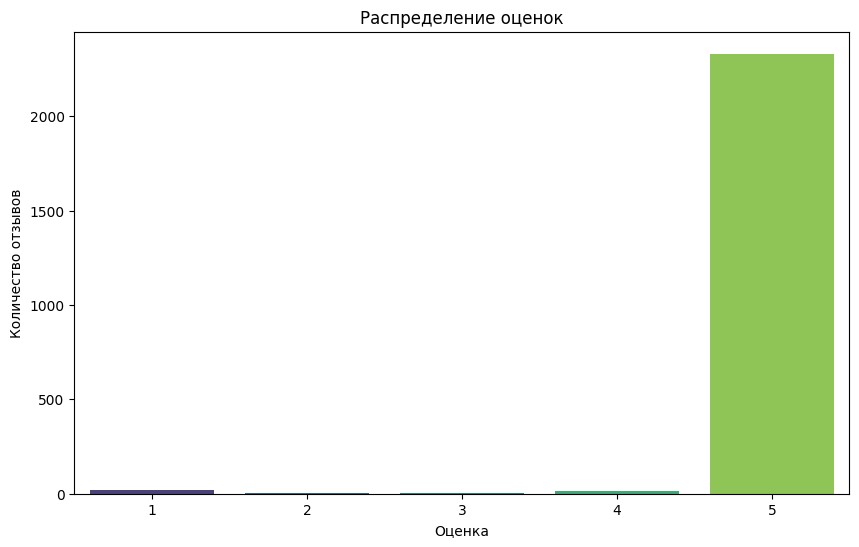

C:\Users\user\AppData\Local\Temp\ipykernel_11836\8333160.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


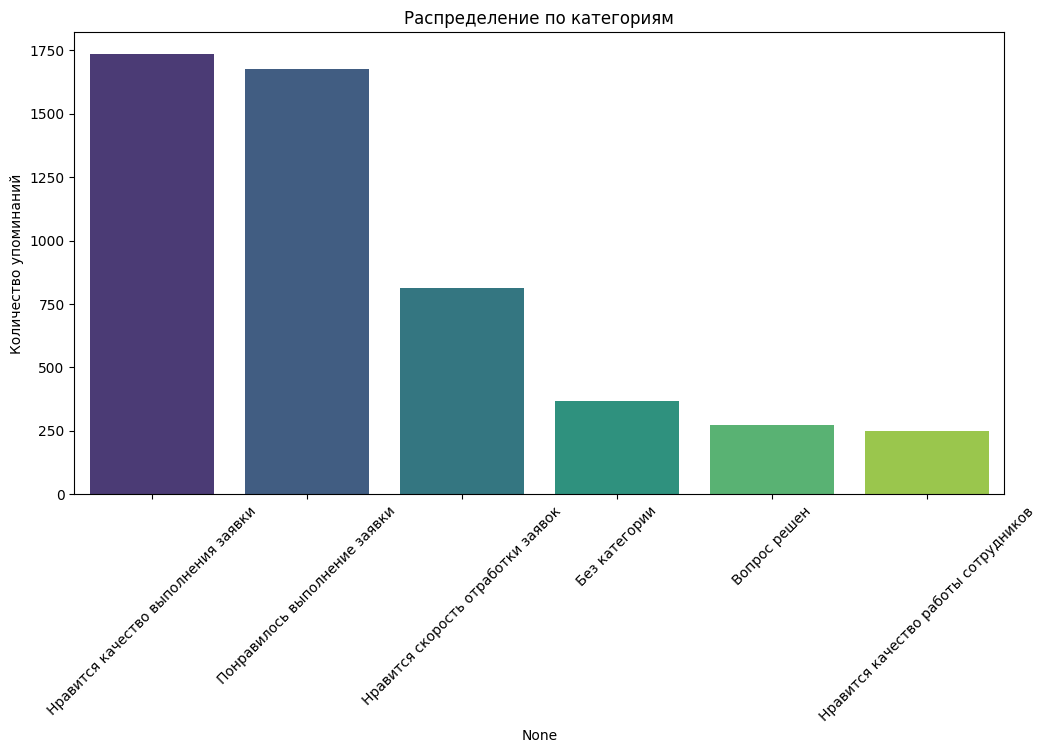

C:\Users\user\AppData\Local\Temp\ipykernel_11836\8333160.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


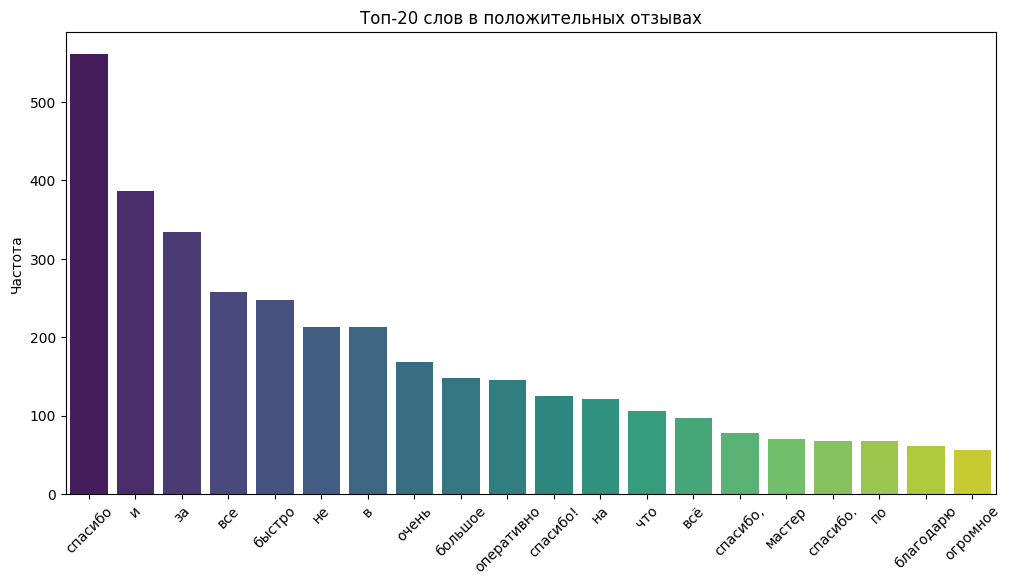

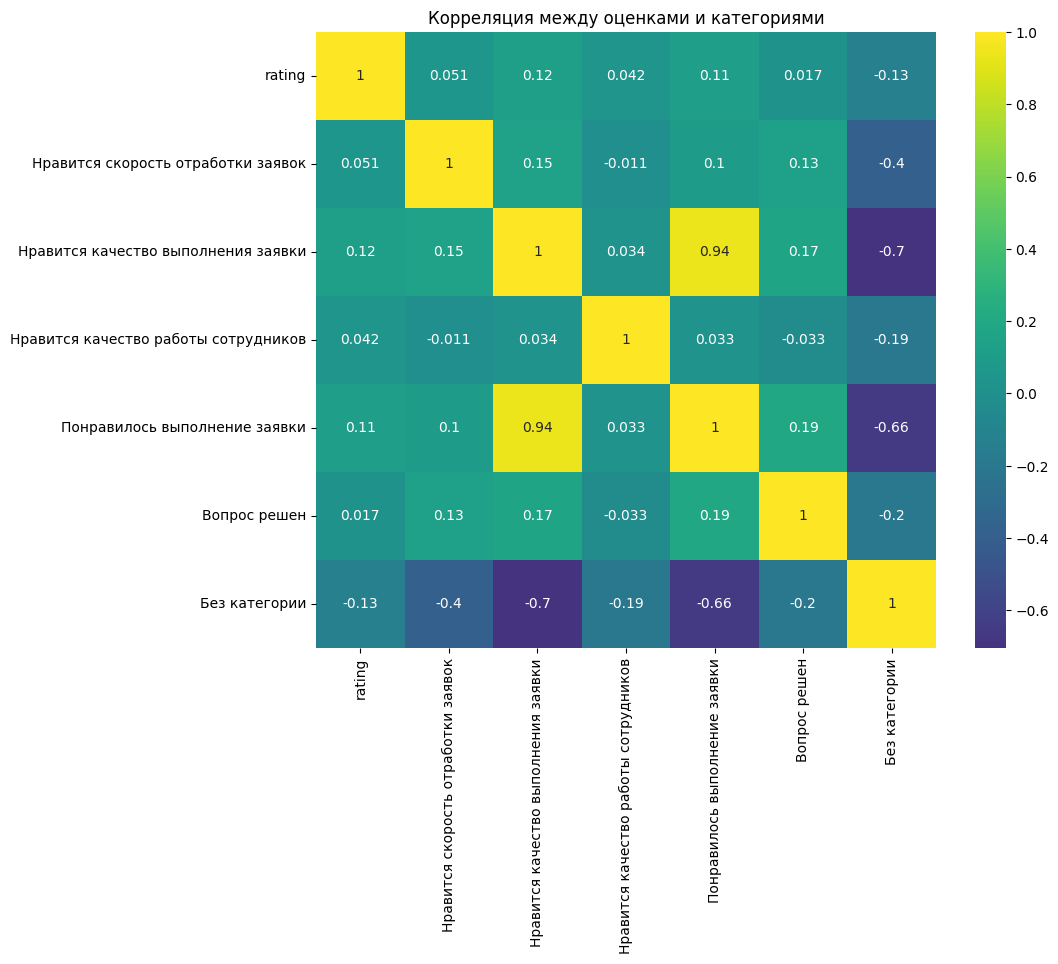

C:\Users\user\AppData\Local\Temp\ipykernel_11836\8333160.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='comment_length', palette='viridis')


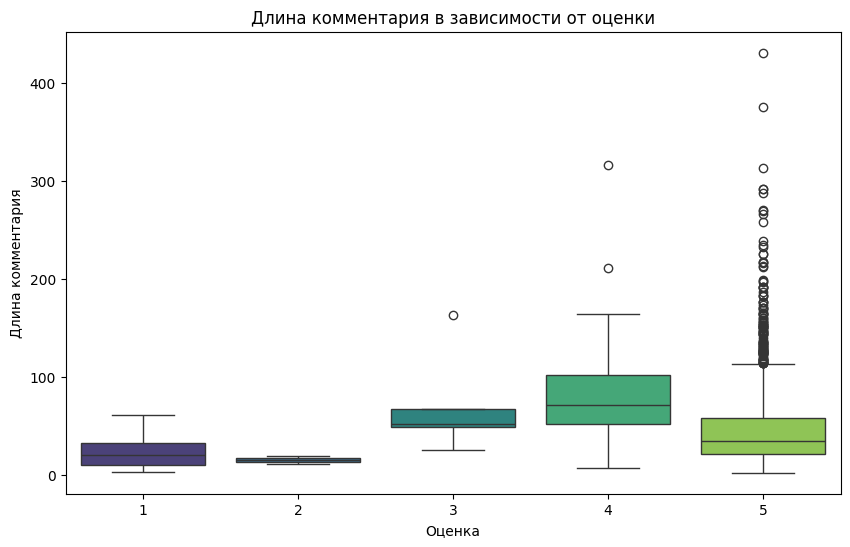

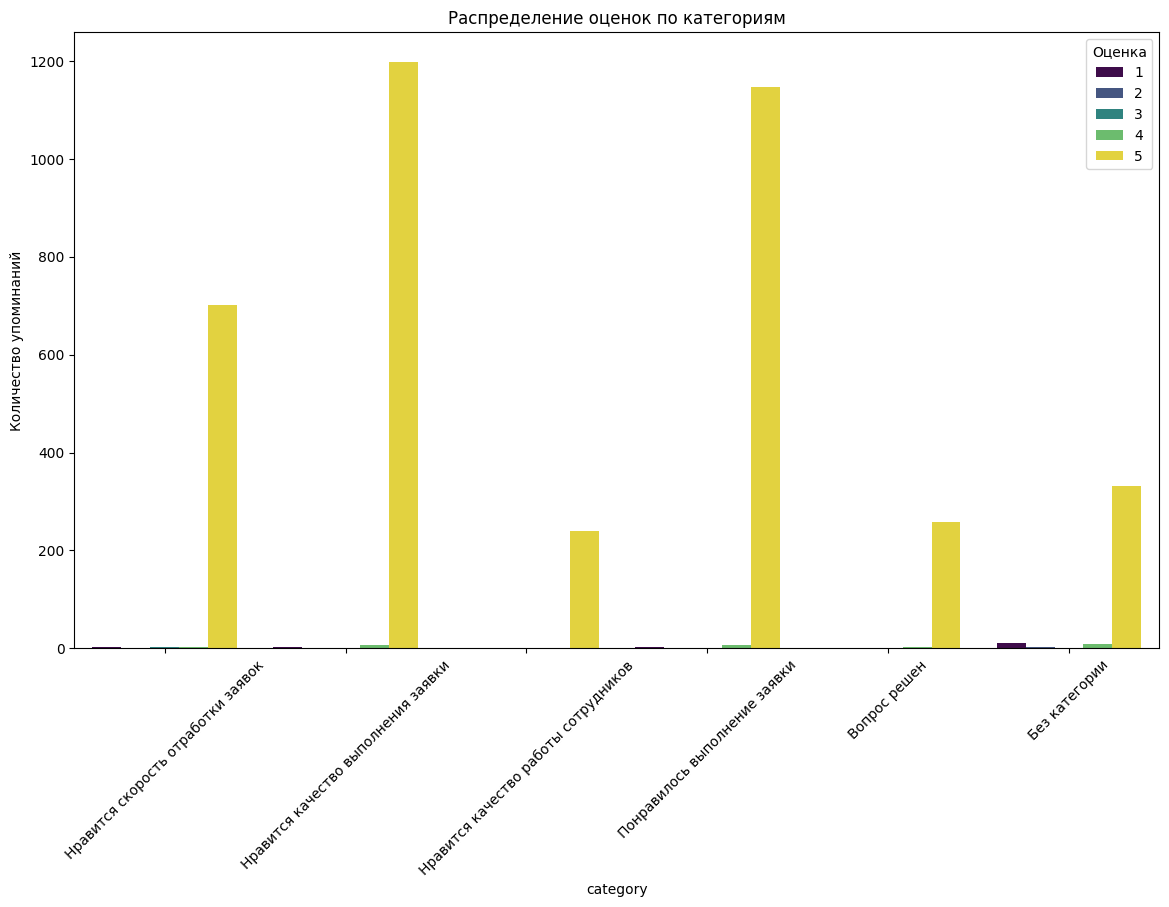


Самые популярные комментарии:
comment
спасибо                                                              1
спасибо большое. все супер                                           1
пришел очень хороший мужчина , все объяснил как нужно сделать .      1
все понятно                                                          1
все ясно 👍                                                           1
все починили                                                         1
спасибо. оперативно                                                  1
супруга с ребенком к соседям зашли,так как света не было. спасибо    1
отличный мастер на 10 с плюсом                                       1
много времени прошло с момента обращения                             1
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_11836\8333160.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


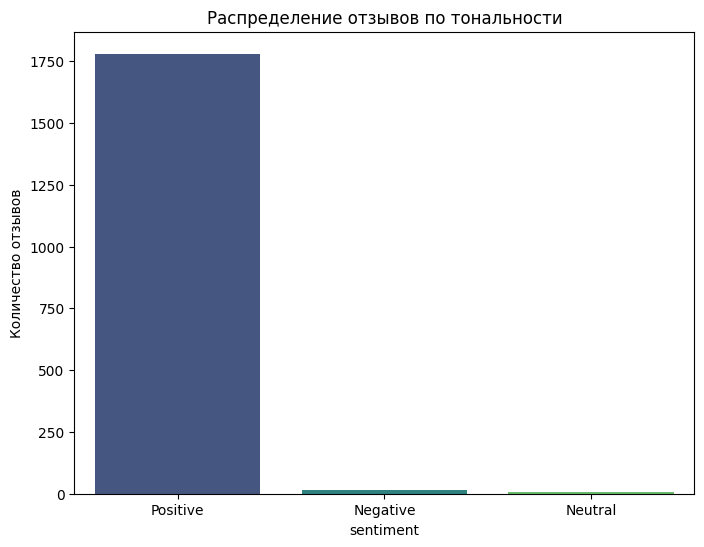


Самые длинные комментарии:
                                                comment  rating  \
2369  16.03.2024 г ребята установили кондиционер. ра...       5   
1699  мария доброе утро!  абсолютно ничего на этаже ...       5   
855   Устранили быстро. Хотелось бы заметить в целом...       4   
1498  спасибо валерию. все сделал хорошо. маленький ...       5   
1865  здравствуйте! на нашем 7 этаже  нет запаха кра...       5   

      comment_length  
2369             431  
1699             376  
855              316  
1498             313  
1865             292  

Ассоциативные правила между категориями:
                                          antecedents  \
21                    (Понравилось выполнение заявки)   
16  (Нравится качество выполнения заявки, Вопрос р...   
20              (Нравится качество выполнения заявки)   
5                     (Понравилось выполнение заявки)   
10  (Нравится скорость отработки заявок, Понравило...   
17      (Понравилось выполнение заявки, Вопрос 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Загрузка данных
df = pd.read_csv('Main_комментарии.csv', encoding='utf-8')

# Предварительный просмотр данных
print(df.head())
print(df.info())

# 1. Анализ распределения оценок (rating)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Распределение оценок')
plt.xlabel('Оценка')
plt.ylabel('Количество отзывов')
plt.show()

# 2. Анализ категорий (последние 6 столбцов)
categories = ['Нравится скорость отработки заявок', 'Нравится качество выполнения заявки', 
              'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 
              'Вопрос решен', 'Без категории']

category_counts = df[categories].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Распределение по категориям')
plt.xticks(rotation=45)
plt.ylabel('Количество упоминаний')
plt.show()

# 3. Анализ текстовых комментариев
# Удаление дубликатов (если есть)
df = df.drop_duplicates(subset=['comment'])

# Самые частые слова в положительных отзывах (rating 4-5)
positive_comments = df[df['rating'] >= 4]['comment'].str.lower().str.replace('[^\w\s]', '')

top_words = Counter(" ".join(positive_comments).split()).most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('Топ-20 слов в положительных отзывах')
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.show()

# 4. Корреляция между оценками и категориями
plt.figure(figsize=(10, 8))
corr_matrix = df[['rating'] + categories].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', center=0)
plt.title('Корреляция между оценками и категориями')
plt.show()

# 5. Анализ длины комментариев
df['comment_length'] = df['comment'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='comment_length', palette='viridis')
plt.title('Длина комментария в зависимости от оценки')
plt.xlabel('Оценка')
plt.ylabel('Длина комментария')
plt.show()

# 6. Распределение оценок по категориям
melted_df = df.melt(id_vars=['rating'], value_vars=categories, var_name='category', value_name='mentioned')

plt.figure(figsize=(14, 8))
sns.countplot(data=melted_df[melted_df['mentioned'] == 1], x='category', hue='rating', palette='viridis')
plt.title('Распределение оценок по категориям')
plt.xticks(rotation=45)
plt.ylabel('Количество упоминаний')
plt.legend(title='Оценка')
plt.show()

# 7. Анализ самых популярных комментариев
top_comments = df['comment'].value_counts().head(10)
print("\nСамые популярные комментарии:")
print(top_comments)

# 8. Соотношение положительных, нейтральных и отрицательных отзывов
df['sentiment'] = np.where(df['rating'] >= 4, 'Positive', 
                          np.where(df['rating'] == 3, 'Neutral', 'Negative'))

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Распределение отзывов по тональности')
plt.ylabel('Количество отзывов')
plt.show()

# 9. Анализ самых длинных комментариев
df['comment_length'] = df['comment'].apply(len)
longest_comments = df.nlargest(5, 'comment_length')[['comment', 'rating', 'comment_length']]
print("\nСамые длинные комментарии:")
print(longest_comments)

# 10. Анализ связи между категориями
from mlxtend.frequent_patterns import apriori, association_rules

# Преобразуем категории в бинарный формат
category_df = df[categories].astype(bool)

# Находим частые наборы
frequent_itemsets = apriori(category_df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("\nАссоциативные правила между категориями:")
print(rules.sort_values('lift', ascending=False).head(10))